# Prediction of "Chances of Admit" of Master Graduate Programs in US Universities from an Indian Perspective

# Problem Statement :

* Students are often worried about their chances of admission in graduate school.
* The objective is to determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.
* The aim here is to help students in shortlisting universities with their profiles by building a predictive machine learning model.
* The predicted output gives them a fair idea about their admission chances in a particular university. 
* This analysis should also help students who are currently preparing or will be preparing to get a better idea about their chances of getting awarded an admission with respect to their scores and other aspects.

# Dataset

* The dataset contains 500 applicants and the corresponding information of their academic scores. The dataset is inspired from the UCLA Graduate Dataset and is owned by Mr.Mohan S Acharya (https://www.kaggle.com/mohansacharya).

* The dataset contains seven different featues which are considered important during the application for Masters Programs.

The features included are :

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )


* The dataset can be downloaded from the Kaggle website : https://www.kaggle.com/mohansacharya/graduate-admissions



# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,classification_report,roc_auc_score,recall_score, precision_score, f1_score, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and Understanding the Dataset

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv', index_col=0)
df.head(20)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


* I've made Serial Number as the index.
* Serial number is just like a unique number to each student entry just similar to primary key in SQL.
* Serial number won't play any role in the prediction model
* Hence instead of removing it, we've made that as the index so that it can be intrepreted in future if neccessary.

# Exploring the Data

### i) Shape 

In [3]:
df.shape

(500, 8)

* The dataset contains 500 entries and 8 features (exlcuding Serial Number)

### ii) Datatypes of the features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


* The columns are all of numeric datatypes.

### iii) Missing Values

In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

 * There are no null values present in the dataset

### iv) Statistical Inference

In [6]:
df.drop('Research', axis=1).describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


* The table above gives us some intuition about all the columns and how are their values spread and other basic statistics values like mean, max, min etc..

# Exploratory Data Analysis (EDA)

## Univariate Analysis

#### Chance of Admit - Target Variable

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,500.0,0.72174,0.14114,0.34,0.63,0.72,0.82,0.97


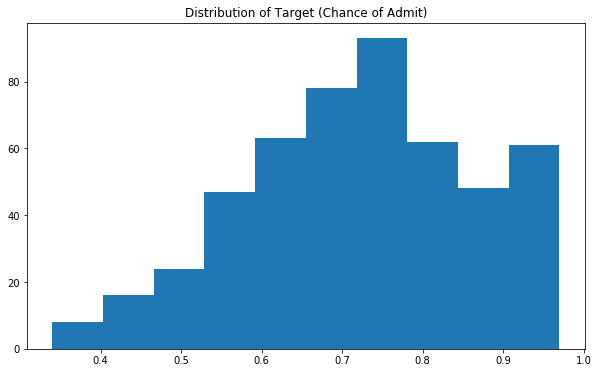

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df['Chance of Admit '])
plt.title('Distribution of Target (Chance of Admit)')
pd.DataFrame(df['Chance of Admit '].describe()).T

* Predominant of the students have got 65% to 75% chances of getting admit. 
* More than 50% of students have got more than 72% chance of admit (using median value)

### Independent Variables 

#### 1) GRE Score

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.472,11.295148,290.0,308.0,317.0,325.0,340.0


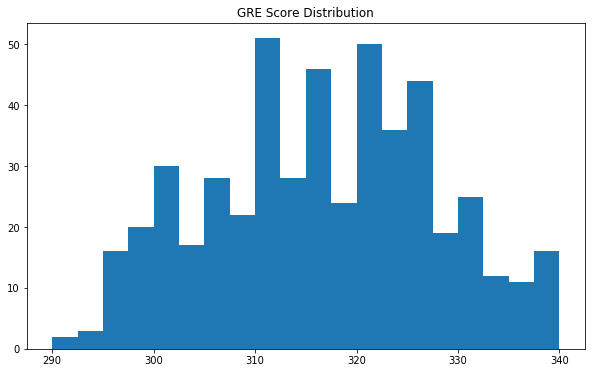

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['GRE Score'], bins=20)
plt.title('GRE Score Distribution')
pd.DataFrame(df['GRE Score'].describe()).T

* Larger group of students have secured GRE score between 308 and 325
* More than 50% of the students scored more 316    

#### 2) TOEFL Score

,count,mean,std,min,25%,50%,75%,max
TOEFL Score,500.0,107.192,6.081868,92.0,103.0,107.0,112.0,120.0


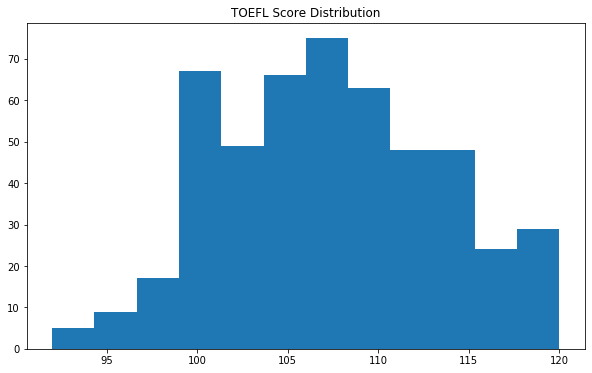

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['TOEFL Score'], bins=12)
plt.title('TOEFL Score Distribution')
pd.DataFrame(df['TOEFL Score'].describe()).T

* Most of the students have scored between 103 and 112 in TOEFL exam
* More than 50% of the students scored TOEFL more 107

#### 3) University Rating

,count,unique,top,freq
University Rating,500,5,3,162


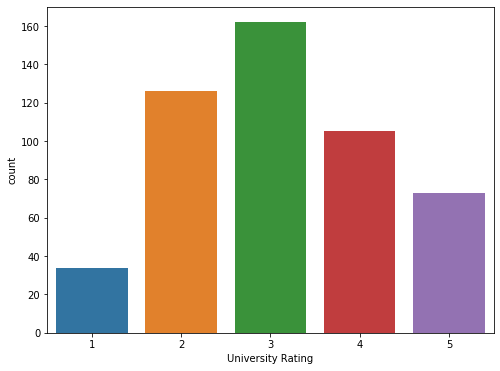

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['University Rating'])
pd.DataFrame(df['University Rating'].astype('O').describe()).T

* From the chart, we can view that the students from universities that have got a rating of 3 are more in number among those who have applied for MS program.
* Also more than 50% of the universities have got rating of 3 and above (median value)

#### 4) SOP

,count,unique,top,freq
SOP,500.0,9.0,4.0,89.0


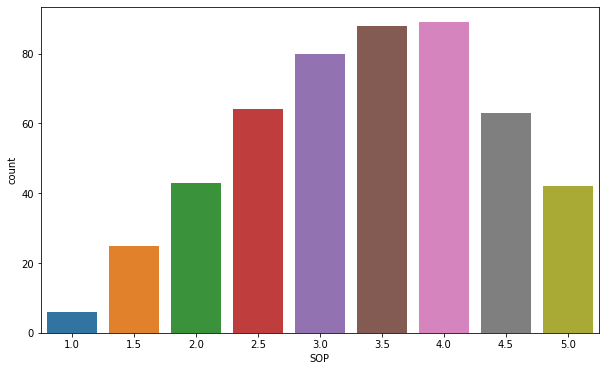

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df['SOP'])
pd.DataFrame(df['SOP'].astype('O').describe()).T

* From the chart, we can view that the students with SOP score of 4 are highest in number.
* Most of the students have a SOP score ranging between 2.5 to 4.
* Also more than 50% of the students have got SOP scores of 3.5 and above (value)

#### 5) LOR

,count,unique,top,freq
LOR,500.0,9.0,3.0,99.0


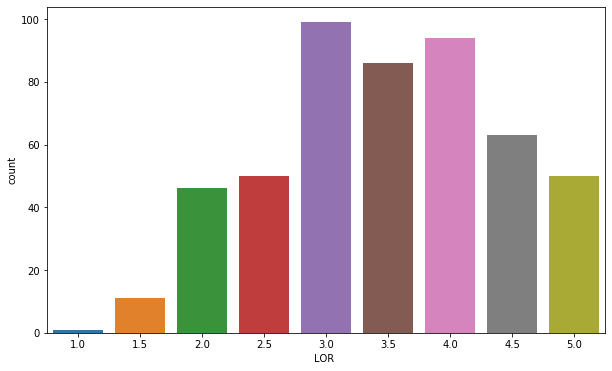

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['LOR '])
pd.DataFrame(df['LOR '].astype('O').describe()).T

* From the chart, we can view that the students with LOR score of 3 are highest in number.
* Most of the students have a LOR score of either 3, 3.5 or 4
* Also more than 50% of the students have got LOR scores of 3.5 and above (median value)

#### 6) CGPA

,count,mean,std,min,25%,50%,75%,max
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92


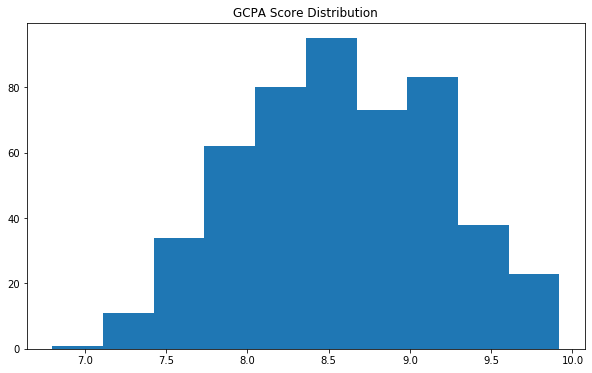

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df['CGPA'])
plt.title('GCPA Score Distribution')
pd.DataFrame(df['CGPA'].describe()).T

* Most of the students have secured GCPA between 8.1 and 9
* More than 50% of the students have CGPA of 8.56 and above

#### 7) Research

,count,unique,top,freq
Research,500,2,1,280


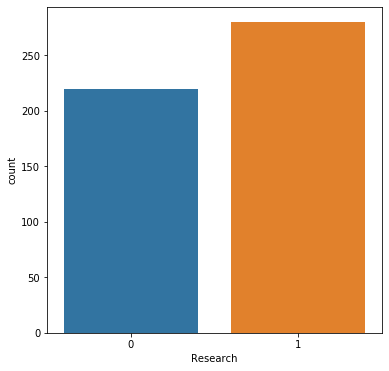

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(df['Research'])
pd.DataFrame(df['Research'].astype('O').describe()).T

* From the chart we can conclude that students with some kind of research are out-numbered by those without any research work

## Bivariate Analysis

#### The Correlation of the predictor variables on target variable 

In [15]:
pd.DataFrame(df.corr()['Chance of Admit '])[:-1]

,Chance of Admit
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
CGPA,0.882413
Research,0.545871


* All the features have a good positive correlation with the target.
* GRE tops the list and has a very high correlation of 0.81 and Research has got the table spoon with 0.54 which is still a good correlation value
* On a whole GRE score will play a vital role in one's chances of getting an MS admit

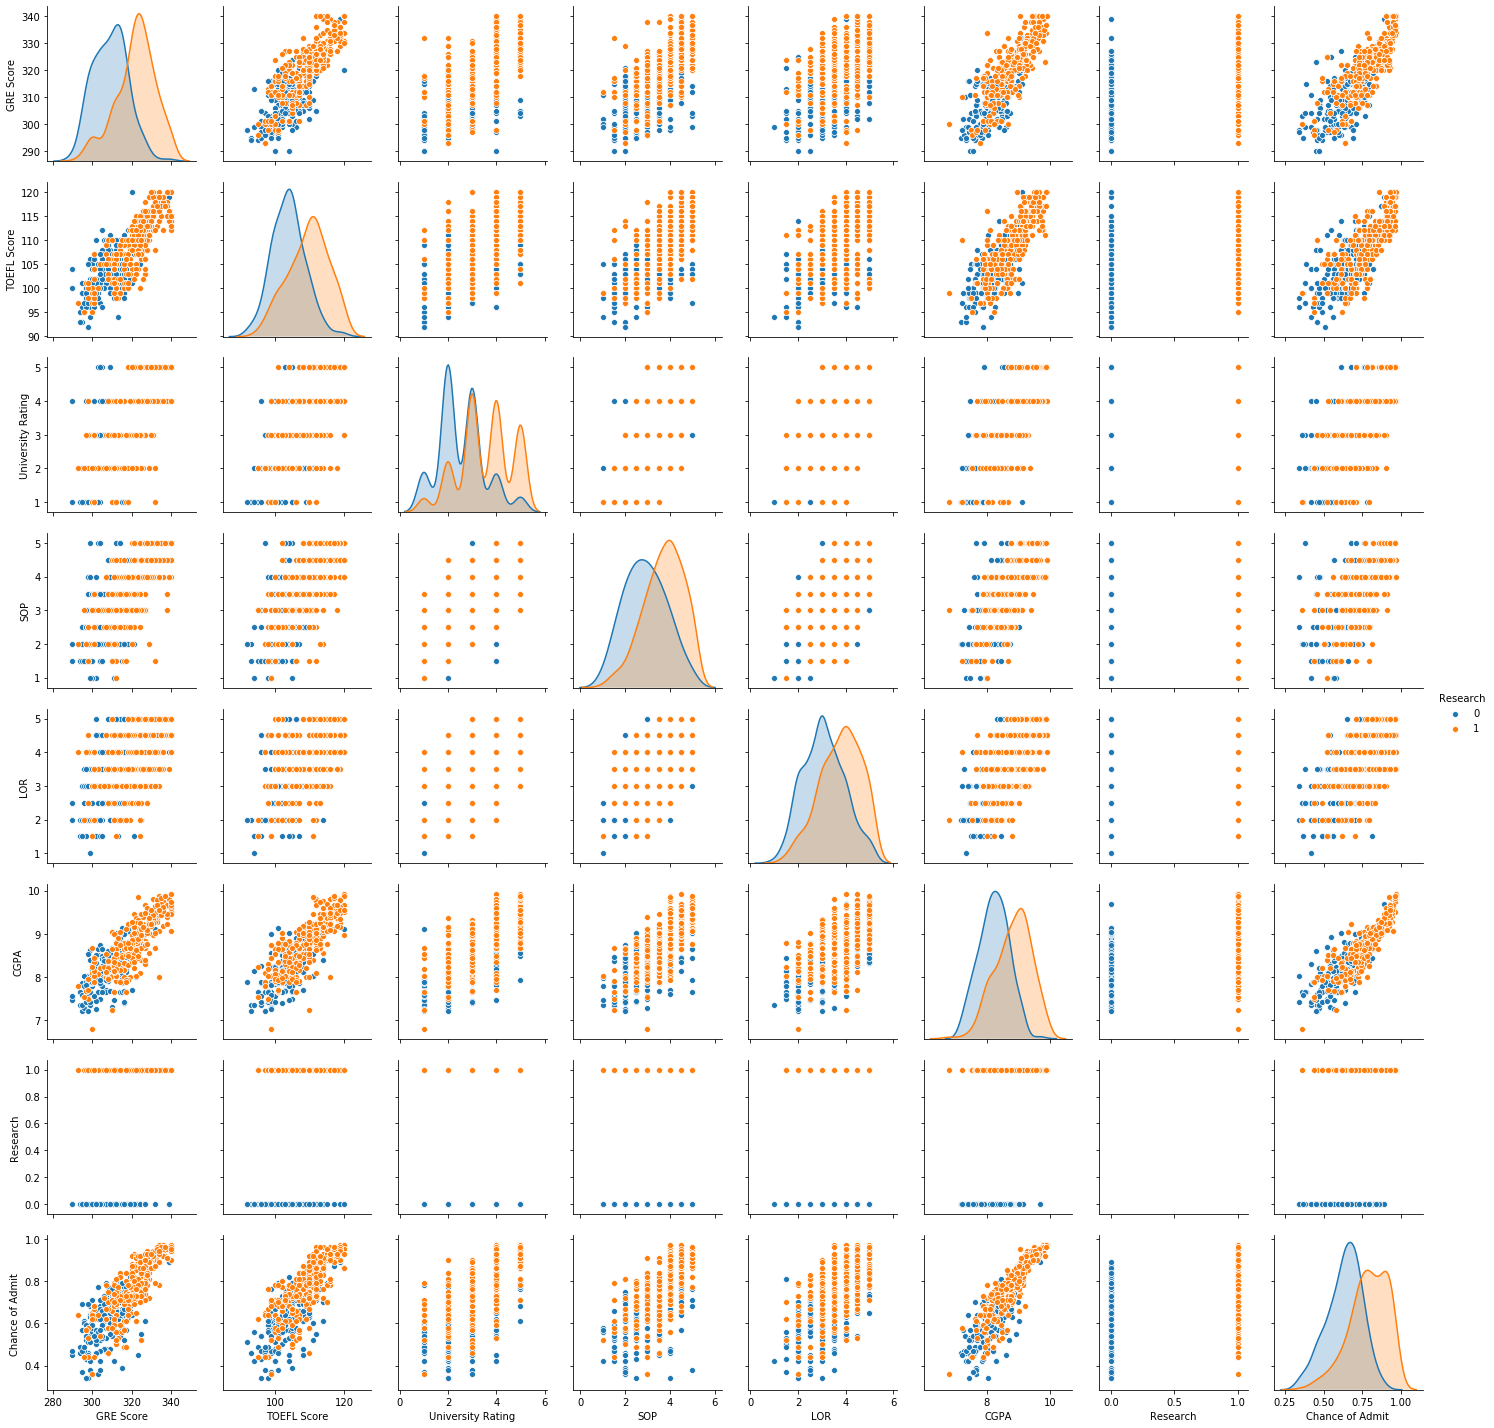

In [16]:
sns.pairplot(df, hue='Research')

* From the distributions, we can infer that students with research experience have got better score in the exams and better SOP, LOP scores and most importantly they are from higher ranked (high rating) universities

### Individual Independent Features vs Target

#### i) GRE Score vs Chance of Admit

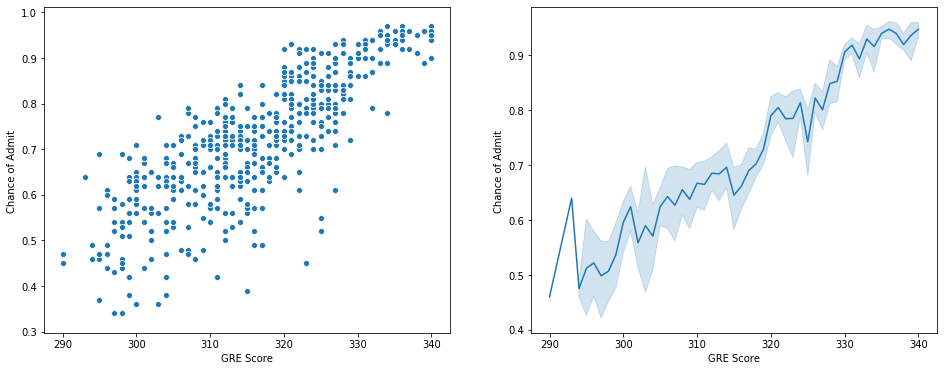

In [17]:
plt.subplots(1,2 , figsize = (16,6))
plt.subplot(1,2,1)
sns.scatterplot(df['GRE Score'], df['Chance of Admit '])
plt.subplot(1,2,2)
sns.lineplot(df['GRE Score'], df['Chance of Admit '])

* As already found from correlation table, the chart too shows that higher the GRE score, higher the chance of getting admit 

#### ii) TOEFL Score vs Chance of Admit

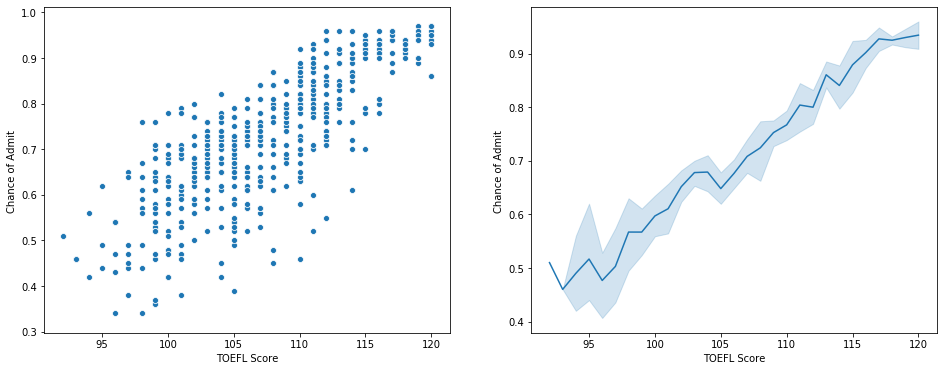

In [18]:
plt.subplots(1,2 , figsize = (16,6))
plt.subplot(1,2,1)
sns.scatterplot(df['TOEFL Score'], df['Chance of Admit '])
plt.subplot(1,2,2)
sns.lineplot(df['TOEFL Score'], df['Chance of Admit '])

* Same as GRE Score, students with a high TOEFL score has a greater chance of getting admit.
    
    

#### iii) University Rating vs Chance of Admit

,mean
University Rating,
1,0.562059
2,0.626111
3,0.702901
4,0.801619
5,0.888082


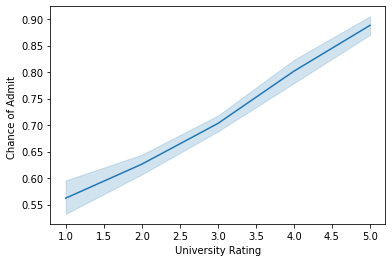

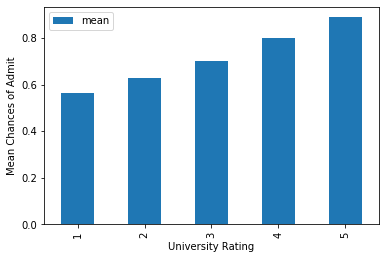

In [19]:
Uni_Mean = df['Chance of Admit '].groupby(df['University Rating']).agg(['mean'])
sns.lineplot(df['University Rating'],df['Chance of Admit '])
Uni_Mean.plot(kind='bar')
plt.ylabel('Mean Chances of Admit')
Uni_Mean

* The above charts depicts that chance of admit is higher for the students from top rated universities.
* Students from universitites rated '5' have a average of whopping 88.8% chances of admit whilst students from '1' rated universities have not a great value of 56.2 % chances

#### iv) SOP vs Chance of Admit

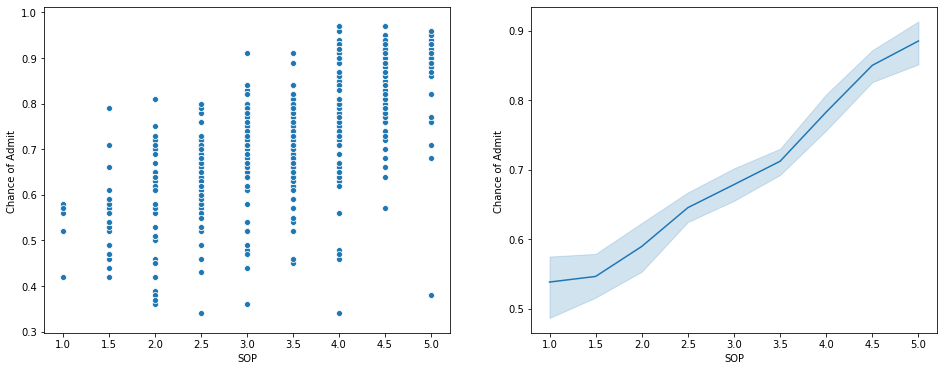

In [20]:
plt.subplots(2,2, figsize = (16,6))
plt.subplot(1,2,1)
sns.scatterplot(df['SOP'], df['Chance of Admit '])
plt.subplot(1,2,2)
sns.lineplot(df['SOP'], df['Chance of Admit '])

* Students who have secured higher score for their Statement of Purpose (SOP), have an upper hand in getting an admit.

#### v) LOR vs Chance of Admit

1.0    1
Name: LOR , dtype: int64

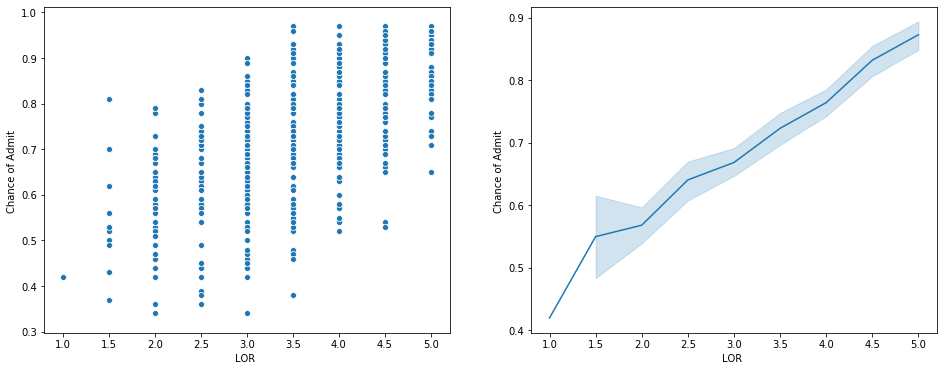

In [21]:
plt.subplots(2,2, figsize = (16,6))
plt.subplot(1,2,1)
sns.scatterplot(df['LOR '], df['Chance of Admit '])
plt.subplot(1,2,2)
sns.lineplot(df['LOR '], df['Chance of Admit '])
df['LOR '].value_counts().tail(1)

* Similary Students who have secured higher score for their Letter of Recommendation (LOR), have an upper hand in getting an admit.
* Another interesting thing we've found is that out of 500 students, only one has got poor score of 1 for LOR. Must be a unlucky folk.

#### vi) GCPA vs Chance of Admit

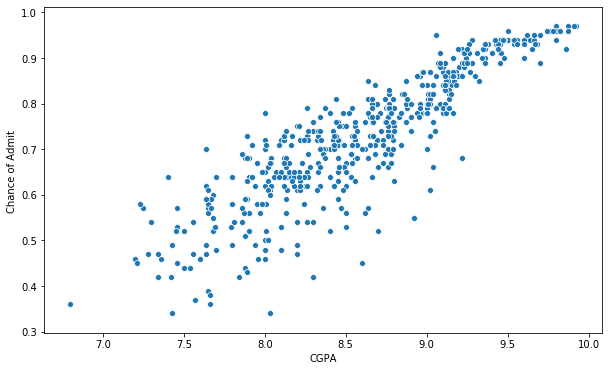

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['CGPA'], df['Chance of Admit '])

* The students with high CGPA are likely to get more chance of admit than those who scored low CGPA.

#### vii) Research vs Chance of Admit

,mean
Research,
0,0.634909
1,0.789964


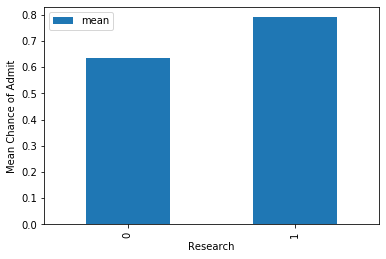

In [23]:
Research_Mean = df['Chance of Admit '].groupby(df['Research']).agg(['mean'])
Research_Mean.plot(kind='bar')
plt.ylabel('Mean Chance of Admit')
Research_Mean

* Students with research experience have a average of 78.9 % chances of admit while those who doesn't  have any research experience are expected to get 63.5% chance of admit

### Analysis Among Independent Features

#### 1) GRE vs other independent features

In [24]:
pd.DataFrame(df.corr()['GRE Score'][1:-1])

,GRE Score
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398


* All the predictor variables have a good positive correlation with GRE.
* Hence we can sense there exists multi collinearity among the variables which needs to be taken care of, while model building.
* So, students who scored higher GRE score will tend to score higher in other aspects too.

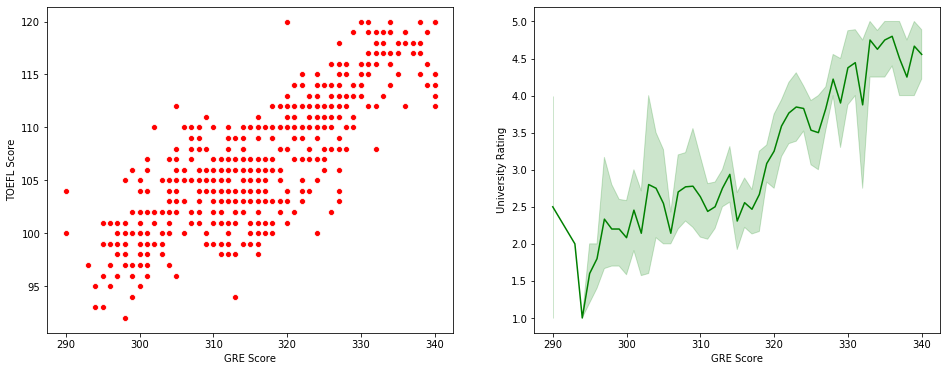

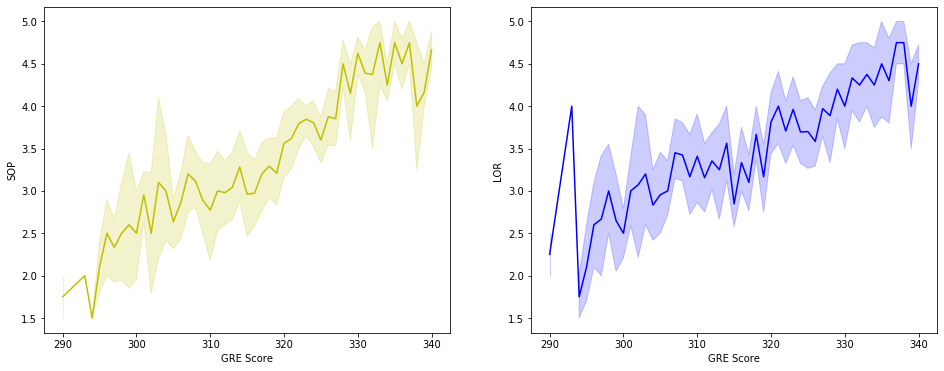

,mean
Research,
0,309.300000
1,322.107143


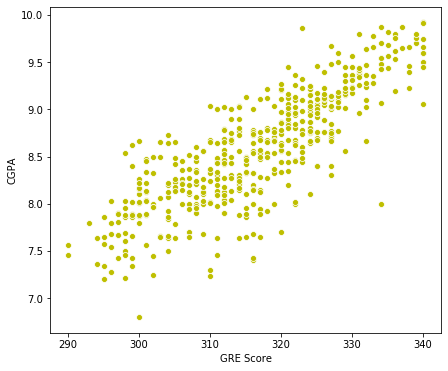

In [25]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(df['GRE Score'],df['TOEFL Score'], color='r')
plt.subplot(1,2,2)
sns.lineplot(df['GRE Score'],df['University Rating'], color='g')
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
sns.lineplot(df['GRE Score'],df['SOP'], color='y')
plt.subplot(1,2,2)
sns.lineplot(df['GRE Score'],df['LOR '], color='b')
plt.show()
plt.figure(figsize=(7,6))
sns.scatterplot(df['GRE Score'],df['CGPA'], color='y')
pd.DataFrame(df.groupby('Research')['GRE Score'].agg(['mean']))

* The mean GRE score of Research oriented students is 322 which others had mean GRE score of 309.
* The plots shows the same as correlaltion table that there is a good positive correlation among features with GRE.

* Multicollearity exists among the features.
* For ex, University Rating vs SOP Score : We know University Rating has higher correlation with GRE score. Hence higher the rating, higher is the GRE score which in turns leads to higher SOP score as GRE and SOP are positively correlalated.
* Same is the case with every other predictor feature.

# Model Building 

### Segregating x & y and generating train- test sets

In [26]:
x = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

x_scaled = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train_s, x_test_s, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.3, random_state = 1)

print("Training Set :", x_train.shape[0], "entries")
print("Testing Set :", x_test.shape[0], "entries")

Training Set : 350 entries
Testing Set : 150 entries


### Base Model

In [28]:
l=[]

def models_lr(x,y):
    mod = {}
    model = LinearRegression().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Linear Regression'
    mod['Train_Score'] = model.score(x,y)
    mod['Test_accuracy'] = r2_score(y_test,ypred)
    mod['RMSE'] = np.sqrt(mean_squared_error(y_test,ypred))
    return mod
l.append(models_lr(x_train,y_train))

def models_lr(x,y):
    mod = {}
    model = LinearRegression().fit(x,y)
    ypred = model.predict(x_test_s)
    mod['Model'] = 'Linear Regression with Scaled Data'
    mod['Train_Score'] = model.score(x,y)
    mod['Test_accuracy'] = r2_score(y_test,ypred)
    mod['RMSE'] = np.sqrt(mean_squared_error(y_test,ypred))
    return mod
l.append(models_lr(x_train_s,y_train))

def models_dt(x,y):
    mod = {}
    model = DecisionTreeRegressor().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decison Tree'
    mod['Train_Score'] = model.score(x,y)
    mod['Test_accuracy'] = r2_score(y_test,ypred)
    mod['RMSE'] = np.sqrt(mean_squared_error(y_test,ypred))
    return mod
l.append(models_dt(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = RandomForestRegressor().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x,y)
    mod['Test_accuracy'] = r2_score(y_test,ypred)
    mod['RMSE'] = np.sqrt(mean_squared_error(y_test,ypred))
    return mod
l.append(models_rf(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = KNeighborsRegressor().fit(x,y)
    ypred = model.predict(x_test_s)
    mod['Model'] = 'KNN'
    mod['Train_Score'] = model.score(x,y)
    mod['Test_accuracy'] = r2_score(y_test,ypred)
    mod['RMSE'] = np.sqrt(mean_squared_error(y_test,ypred))
    return mod
l.append(models_rf(x_train_s,y_train))

pd.DataFrame(l)

,Model,Train_Score,Test_accuracy,RMSE
0,Linear Regression,0.820984,0.815767,0.064233
1,Linear Regression with Scaled Data,0.820984,0.815767,0.064233
2,Decison Tree,1.000000,0.593366,0.095429
3,Random Forest,0.955478,0.767280,0.072193
4,KNN,0.835375,0.771644,0.071513


* We are choosing Linear Regression as our base model as it has the greater training and testing accuracy and also lower mean squared error than the other models.



# Final Model and Optimizations

### Feature Selection

#### 1) VIF Method

* Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity
* The VIF is widely used as a measure of the degree of multi-collinearity of the i-th independent variable with the other independent variables in a regression model. 
* If we have indepedent variables X1, X2, X3, … Xi, the VIF for variable X1 can be calculated by running an ordinary least square regression that has X1 as a function of all the other variables X2 … Xi. 
* The VIF is than computed following Equation :
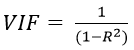
* Higher the VIF, higher the R2 which means the variable X1 is collinear with other indepedent X2...Xi variables.
* As a rule of thumb, VIF values in excess of 5 or 10 are often considered an indication that multicollinearity may by a cause of problem.

In [29]:
vif = [ variance_inflation_factor(x_train_c.values, i ) for i in range(x_train_c.shape[1])]
vif_df = pd.DataFrame({'vif' : vif[1:]} , index = x_train.columns)
vif_df

,vif
GRE Score,4.490801
TOEFL Score,4.150300
University Rating,2.999308
SOP,2.962935
LOR,2.026492
CGPA,4.634872
Research,1.528120


* Generally considering 5 as the threshold, we can see that all the features came out with VIF values lesser than the threshold.
* Hence VIF method of feature selection suggests to go with all the features for building models.
* So, we will try some other feature selection techniques too
* Hence Accuracy will be still the same as base model (0.815767)

#### 2) RFE Method

* Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy.
* RFE is able to work out the combination of attributes that contribute to the prediction on the target variable.
* It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [47]:
for i in range(1,df.shape[1]):
   
    rfe = RFE(LinearRegression(),i).fit(x,y)
    print(x.columns[rfe.support_])
    x_train1,x_test1,y_train,y_test = train_test_split(rfe.transform(x),y,test_size=0.3,random_state=1)
    LR = LinearRegression()
    LR.fit(x_train1,y_train)
    y_pred1 = LR.predict(x_test1)
    print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred1)))
    print("Accuracy : ",r2_score(y_test,y_pred1))
    print('*'*100)
    
params = [{'n_features_to_select' : list(range(1,8))}]
model_cv = GridSearchCV(estimator = rfe, param_grid= params, scoring='r2', cv=5)
model_cv.fit(x_train1, y_train)
print()
print("Number of Features : ",model_cv.best_params_);print()
print('*'*100); print()

rfe1 = RFE(LinearRegression(), n_features_to_select = 6).fit(x_train1,y_train)
y_pred2 = rfe1.predict(x_test)
print("Train Accuracy after RFE feature selection :", rfe1.score(x_train1,y_train))
print("Test Accuracy after RFE feature selection :", r2_score(y_test,y_pred2))
print("RMSE after RFE feature selection :", np.sqrt(mean_squared_error(y_test,y_pred2)))
print(); print('*'*100)

cols = pd.DataFrame({'features': x.columns, 'selection' : rfe1.support_, 'rank' : rfe1.ranking_ })
cols

Index(['CGPA'], dtype='object')
RMSE :  0.06731107814122392
Accuracy :  0.7976898288583101
****************************************************************************************************
Index(['CGPA', 'Research'], dtype='object')
RMSE :  0.06551830407461488
Accuracy :  0.80832303755601
****************************************************************************************************
Index(['LOR ', 'CGPA', 'Research'], dtype='object')
RMSE :  0.06372055224592797
Accuracy :  0.8186975445817594
****************************************************************************************************
Index(['University Rating', 'LOR ', 'CGPA', 'Research'], dtype='object')
RMSE :  0.06492033904808117
Accuracy :  0.8118058226751722
****************************************************************************************************
Index(['TOEFL Score', 'University Rating', 'LOR ', 'CGPA', 'Research'], dtype='object')
RMSE :  0.06535357261132486
Accuracy :  0.8092856855501253
**************

,features,selection,rank
0,GRE Score,True,1
1,TOEFL Score,True,1
2,University Rating,True,1
3,SOP,False,2
4,LOR,True,1
5,CGPA,True,1
6,Research,True,1


* So, RFE has eliminated 'SOP' from the set of features to be used for modelling.
* The 'best r2_score' and 'least rmse' in RFE was achieved when only 6 features (excluding SOP) were used.
* There is a very little decrease in the training (82.0984 % to 82.0965 %) and a good increase in the test accuracy (81.5767 % to 81. 6071 %) and RMSE has reduced a liitle bit.
* But still, the other 6 features have multi collinearity i.e there is data redundancy in place (when 2 features convey the same information. for ex : we know if students either high GRE or high TOEFL, the chances are high). So, both GRE and TOEFL conveys the same linear information.
* As we know, one of the assumptions for linear regression is that there shouldn't be multi collinearity.
* Hence we have to look up for other possible feature selection techniques as well.

#### 3) Pearson Correlation Method

* One of the simplest method for understanding a feature’s relation to the target variable is Pearson correlation coefficient, which measures linear correlation between two variables and pearson correlation is merely a number between -1 and 1.
* Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable.
* So, when two features have high correlation among themselves, we can drop that feature which has lesser correlation with the target.
* Formula to calculate pearson correlation : 
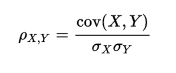

In [31]:
pd.DataFrame(df.corr()['Chance of Admit '][:-1])

,Chance of Admit
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
CGPA,0.882413
Research,0.545871


* At the first step, we took first 2 features and examined multicollinearity within them and the process is continued until there is no data redundancy

In [32]:
df[['GRE Score','TOEFL Score', 'Chance of Admit ']].corr()

,GRE Score,TOEFL Score,Chance of Admit
GRE Score,1.000000,0.827200,0.810351
TOEFL Score,0.827200,1.000000,0.792228
Chance of Admit,0.810351,0.792228,1.000000


* Since there is a greater correlation b/w GRE - TOEFL (above abs(0.5)), and GRE has greater correlation with Chance of Admit, we have to remove TOEFL Score.

In [33]:
df[['GRE Score','University Rating', 'Chance of Admit ']].corr()

,GRE Score,University Rating,Chance of Admit
GRE Score,1.000000,0.635376,0.810351
University Rating,0.635376,1.000000,0.690132
Chance of Admit,0.810351,0.690132,1.000000


* Since there is a greater correlation b/w GRE - University Rating, and GRE has greater correlation with Chance of Admit, we have to remove University Rating.

In [34]:
df[['GRE Score','SOP', 'Chance of Admit ']].corr()

,GRE Score,SOP,Chance of Admit
GRE Score,1.000000,0.613498,0.810351
SOP,0.613498,1.000000,0.684137
Chance of Admit,0.810351,0.684137,1.000000


* Since there is a greater correlation b/w GRE - SOP, and GRE has greater correlation with Chance of Admit, we have to remove SOP

In [35]:
df[['GRE Score','LOR ', 'Chance of Admit ']].corr()

,GRE Score,LOR,Chance of Admit
GRE Score,1.000000,0.524679,0.810351
LOR,0.524679,1.000000,0.645365
Chance of Admit,0.810351,0.645365,1.000000


* Since there is a greater correlation b/w GRE - LOR, and GRE has greater correlation with Chance of Admit, we have to remove LOR

In [36]:
df[['GRE Score','CGPA', 'Chance of Admit ']].corr()

,GRE Score,CGPA,Chance of Admit
GRE Score,1.000000,0.825878,0.810351
CGPA,0.825878,1.000000,0.882413
Chance of Admit,0.810351,0.882413,1.000000


* Since there is a greater correlation b/w GRE - CGPA, and CGPA has greater correlation with Chance of Admit, we have to remove GRE

In [37]:
df[['CGPA','Research', 'Chance of Admit ']].corr()

,CGPA,Research,Chance of Admit
CGPA,1.000000,0.501311,0.882413
Research,0.501311,1.000000,0.545871
Chance of Admit,0.882413,0.545871,1.000000


* Since there is a greater correlation b/w CGPA - Research, and CGPA has greater correlation with Chance of Admit, we have to remove Research

- So, finally only 'CGPA feature' is choosed by Pierson Correlation method 
* Lets build model using CGPA and check out the results

In [48]:
x_PC = df[['CGPA']]
x_train_PC, x_test_PC, y_train, y_test = train_test_split(x_PC, y, test_size= 0.3, random_state = 1)

LR_PC = LinearRegression().fit(x_train_PC, y_train)
y_pred_PC = LR_PC.predict(x_test_PC)

print("Train Accuracy After Pearson Correlation : ", LR_PC.score(x_train_PC, y_train))
print("Test Accuracy After Pearson Correlation : ", r2_score(y_test, y_pred_PC))
print("RMSE After Pearson Correlation : ",np.sqrt(mean_squared_error(y_test, y_pred_PC)))

Train Accuracy After Pearson Correlation :  0.7677626483994718
Test Accuracy After Pearson Correlation :  0.7976898288583101
RMSE After Pearson Correlation :  0.06731107814122392


* The training and test accuracy are lower than of RFE and VIF (base model) and RMSE is higher.
* Hence Pearson Correlation underperforms for this dataset.

#### 4) Backward Elimination

* In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.
* For more details about backward elimination, please refer : https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

In [39]:
cols = list(x.columns)
pmax=1
while(len(cols)>0):
    p = []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y, x_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break       
selected_columns = cols
print("Choosed Features : ",selected_columns)

Choosed Features :  ['GRE Score', 'TOEFL Score', 'LOR ', 'CGPA', 'Research']


In [50]:
x_back = df[['GRE Score', 'TOEFL Score', 'LOR ', 'CGPA', 'Research']]
x_train_back, x_test_back, y_train, y_test = train_test_split(x_back, y, test_size= 0.3, random_state = 1)

LR_back = LinearRegression().fit(x_train_back, y_train)
y_pred_back = LR_back.predict(x_test_back)

print("Train Accuracy After Backward Elimination : ", LR_back.score(x_train_back, y_train))
print("Test Accuracy After Backward Elimination : ", r2_score(y_test, y_pred_back))
print("RMSE After Backward Elimination : ",np.sqrt(mean_squared_error(y_test, y_pred_back)))

Train Accuracy After Backward Elimination :  0.8183289328491703
Test Accuracy After Backward Elimination :  0.8189427818772382
RMSE After Backward Elimination :  0.06367744211882738


* Backward Elimination seems to be the better feature selection method as the test accuracy has improved from 81.5767 % to 81.8942 % although there is a slight decrease in training (82.0984 % to 91.8329 %) and also RMSE has reduced to a certain good amount from 0.06423 to 0.06367

##### Results After Feature Selection :
    
VIF/ Base Model (all features) :

* Accuracy : 0.815767	
* RMSE : 0.064233
    
RFE (eliminated SOP) :

* Accuracy : 0.81607
* RMSE : 0.06418

Pearson (only CGPA) :

* Accuracy : 0.79769
* RMSE : 0.067311

Backward Elimination (eliminated SOP, University Rating) :

* Accuracy : 0.8189428
* RMSE : 0.06367


##### Inference After Feature Selection :

* So finally we have concluded that 'Backward Elimination' is the best feature selection technique fot the dataset as it increased the accuracy and reduced the error.

## Regularization Techniques

* Regularization is generally performed to avoid over fitting of the data.
* Eventhough there is no overfitting in our model, still lets try out the regularization models to see that whether the accuracy gets better.

### Ridge

In [59]:
for i in [100,10,1,0.1, 0.01, 0.001, 0.0001,0.00001, 0.000001]:
    rr = Ridge(alpha=i) 
    rr.fit(x_train_back, y_train) 
    print("Rigde with Learning Rate of",i,":\n")
    print("Train Accuracy After Rigde : ", rr.score(x_train_back, y_train))
    print("Test Accuracy After Rigde : ",rr.score(x_test_back, y_test),'\n')
    print("-"*100,"\n")
    

Rigde with Learning Rate of 100 :

Train Accuracy After Rigde :  0.7807524386014391
Test Accuracy After Rigde :  0.7600420210284351 

---------------------------------------------------------------------------------------------------- 

Rigde with Learning Rate of 10 :

Train Accuracy After Rigde :  0.8147894483128587
Test Accuracy After Rigde :  0.8076527123581937 

---------------------------------------------------------------------------------------------------- 

Rigde with Learning Rate of 1 :

Train Accuracy After Rigde :  0.8182694341808929
Test Accuracy After Rigde :  0.817818628549484 

---------------------------------------------------------------------------------------------------- 

Rigde with Learning Rate of 0.1 :

Train Accuracy After Rigde :  0.8183283002933166
Test Accuracy After Rigde :  0.8188316275400302 

---------------------------------------------------------------------------------------------------- 

Rigde with Learning Rate of 0.01 :

Train Accuracy After

###### Inference :

* Ridge with learning rate of 0.00001 and  0.000001 gave the highest accuracy among all and also we can notice that more or less the accuracy has neither increased nor decreased after performing Ridge (Same accuracy after feature selection).
* So, Ridge won't be of much useful here


### Lasso

In [60]:
for i in [0.01, 0.001, 0.0001,0.00001, 0.000001]:
    lasso = Lasso(alpha=i) 
    lasso.fit(x_train_back, y_train) 
    print("Lasso with Learning Rate of",i,":\n")
    print("Train Accuracy After Lasso : ", lasso.score(x_train_back, y_train))
    print("Test Accuracy After Lasso : ",lasso.score(x_test_back, y_test),'\n')
    print("-"*100,"\n")

Lasso with Learning Rate of 0.01 :

Train Accuracy After Lasso :  0.7610749881256773
Test Accuracy After Lasso :  0.7410886348342953 

---------------------------------------------------------------------------------------------------- 

Lasso with Learning Rate of 0.001 :

Train Accuracy After Lasso :  0.8176235182365729
Test Accuracy After Lasso :  0.8158100168320992 

---------------------------------------------------------------------------------------------------- 

Lasso with Learning Rate of 0.0001 :

Train Accuracy After Lasso :  0.8183218674218009
Test Accuracy After Lasso :  0.8186796530968419 

---------------------------------------------------------------------------------------------------- 

Lasso with Learning Rate of 1e-05 :

Train Accuracy After Lasso :  0.818328861213553
Test Accuracy After Lasso :  0.8189170617445651 

---------------------------------------------------------------------------------------------------- 

Lasso with Learning Rate of 1e-06 :

Train Ac

###### Inference :

* Lasso with learning rate of 0.000001 gave the highest accuracy among all and also we can notice that the test accuracy has very very minutely decreased after performing lasso ( 81.89428 % to 81.89402 i.e decreased by 0.00026).
* So, Lassso too more less gave the same accuracy as of feature selection and hence won't be of much useful.

### ElasticNet

In [61]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], 
                        normalize=True,copy_X=True, positive=False,)
cv_model.fit(x_train_back, y_train)

EN = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
EN.fit(x_train_back, y_train)

print("Train Accuracy After ElasticNet : ", EN.score(x_train_back, y_train))
print("Test Accuracy After ElasticNet : ",r2_score(y_test, EN.predict(x_test_back)))

Train Accuracy After ElasticNet :  0.8183244872292327
Test Accuracy After ElasticNet :  0.8188311340695056


###### Inference  :

* Both training and test accuracy have decreased after ElasticNet.
* So much like the the above 2 regularization methods, ElasticNet too won't be useful 

## Ensemble Techniques

* Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).
* So lets try out ensemble models and check out if there's an improvement in model accuracy

#### Bagging Regressor

In [62]:
Bagg = BaggingRegressor().fit(x_train_back, y_train)
y_pred_bagg = Bagg.predict(x_test_back)

print("Train Accuracy After Bagging : ", Bagg.score(x_train_back, y_train))
print("Test Accuracy After Bagging : ", r2_score(y_test, y_pred_bagg))
print("RMSE After Bagging : ",np.sqrt(mean_squared_error(y_test, y_pred_bagg)))

Train Accuracy After Bagging :  0.9579876220014326
Test Accuracy After Bagging :  0.7503660999121837
RMSE After Bagging :  0.07477035954619093


#### AdaBoosting

In [63]:
AdaBoost = AdaBoostRegressor().fit(x_train_back, y_train)
y_pred_ada = AdaBoost.predict(x_test_back)

print("Train Accuracy After AdaBoost : ", AdaBoost.score(x_train_back, y_train))
print("Test Accuracy After AdaBoost : ", r2_score(y_test, y_pred_ada))
print("RMSE After AdaBoost : ",np.sqrt(mean_squared_error(y_test, y_pred_ada)))

Train Accuracy After AdaBoost :  0.8265712975951522
Test Accuracy After AdaBoost :  0.749567639275877
RMSE After AdaBoost :  0.07488984156781513


#### Gradient Boosting

In [64]:
Gradient = GradientBoostingRegressor().fit(x_train_back, y_train)
y_pred_grad = Gradient.predict(x_test_back)

print("Train Accuracy After Gradient Boost : ", Gradient.score(x_train_back, y_train))
print("Test Accuracy After Gradient Boost : ", r2_score(y_test, y_pred_grad))
print("RMSE After Gradient Boost: ",np.sqrt(mean_squared_error(y_test, y_pred_grad)))

Train Accuracy After Gradient Boost :  0.9236185499572036
Test Accuracy After Gradient Boost :  0.7829777950284174
RMSE After Gradient Boost:  0.06971556861630875


##### Inferences : 

* The ensemble models especially Bagging and Gradient Boosting have greatly increased the training accuracy but on the other hand the test accuracy and RMSE has gotten worse.
* So it won't be a great idea to make use of Ensembling techniques to be performed over the dataset.
* Moreover the model that we got after feature selection is indeed not a weak learner and hence it justifies our assumption.

# Final Choosed Model and Conclusion

* We have choosed Linear Regresion after feature selection using Backward Eliminiation as our final Predictive model.
* We have finally built a model with Training Accuracy of 81.83 % and test accuracy of 81.89 % and with a low RMSE of 0.06367
* This predictive model would be a huge asset for all those students who are literally confused or worried about their admission acceptance and would give them a clear picture of where they stand in respect to their score in the exams and other aspects.
* This model can also be used by higher education consulting companies for their analysis and the model would serve them better results.